In [105]:
import warnings 
warnings.filterwarnings('ignore')

# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# For entropy computation
from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# # TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()



# Read in data

In [106]:
# Read data
X_train_3 = pd.read_excel('data/model_inputs/x_train_3perc_lag3.xlsx')
X_train_5 = pd.read_excel('data/model_inputs/x_train_5perc_lag3.xlsx')

y_train_3 = pd.read_excel('data/model_inputs/y_train_3perc_lag3.xlsx')
y_train_5 = pd.read_excel('data/model_inputs/y_train_5perc_lag3.xlsx')

# filter for duplicates 
X_train_3 = X_train_3.rename({'Unnamed: 0':'Date'}, axis = 1)
X_train_5 = X_train_5.rename({'Unnamed: 0':'Date'}, axis = 1)

In [107]:
y_train_5['decision'] = y_train_5['decision'].apply(lambda x: 'HOLD' if x==0 else 'SELL' if x==-1 else 'BUY')
y_train_3['decision'] = y_train_3['decision'].apply(lambda x: 'HOLD' if x==0 else 'SELL' if x==-1 else 'BUY')

In [108]:
train_3 = X_train_3.copy(deep = True)
train_3['target'] = y_train_3['decision']

In [109]:
train_5 = X_train_5.copy(deep = True)
train_5['target'] = y_train_5['decision']

## Sentiments as Predictors

In [110]:
df_grouped_3 = train_3.groupby('target').mean().reset_index()
df_grouped_5 = train_5.groupby('target').mean().reset_index()

def plot_sentiments_by_class(df1, start, end):
    results = []
    metric = []
    for i in df1.columns[start:end]:
        results.extend(list(df1[i]))
        metric.append(i)
        metric.append(i)
        metric.append(i)

    df = pd.DataFrame()
    df['target'] = list(df1['target'])*len(df1.columns[start:end])
    df['results'] = results
    df['metric'] = metric
    return df

In [111]:
df_3_reddit = plot_sentiments_by_class(df_grouped_3,2,4)
df_5_reddit = plot_sentiments_by_class(df_grouped_5,2,4)

In [112]:
df_3_nyt = plot_sentiments_by_class(df_grouped_3,5,7)
df_5_nyt = plot_sentiments_by_class(df_grouped_5,5,7)

### Reddit

Text(0.5, 1.0, 'Threshold = 3%')

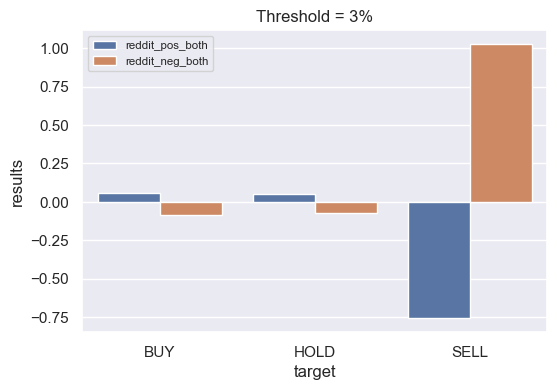

In [113]:
# plot with seaborn barplot
sns.barplot(data=df_3_reddit, x='target', y='results', hue='metric')
plt.legend(fontsize='x-small', title_fontsize='10')
plt.title('Threshold = 3%')

Text(0.5, 1.0, 'Threshold = 5%')

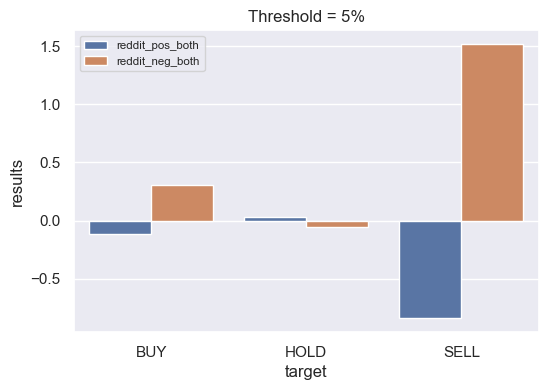

In [114]:
# plot with seaborn barplot
sns.barplot(data=df_5_reddit, x='target', y='results', hue='metric')
plt.legend(fontsize='x-small', title_fontsize='10')
plt.title('Threshold = 5%')

### NYT

Text(0.5, 1.0, 'Threshold = 3%')

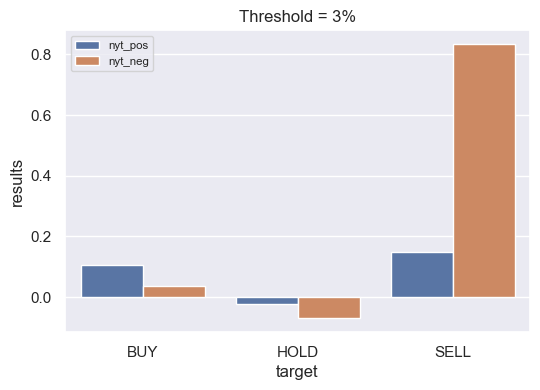

In [115]:
# plot with seaborn barplot
sns.barplot(data=df_3_nyt, x='target', y='results', hue='metric')
plt.legend(fontsize='x-small', title_fontsize='10')
plt.title('Threshold = 3%')

Text(0.5, 1.0, 'Threshold = 5%')

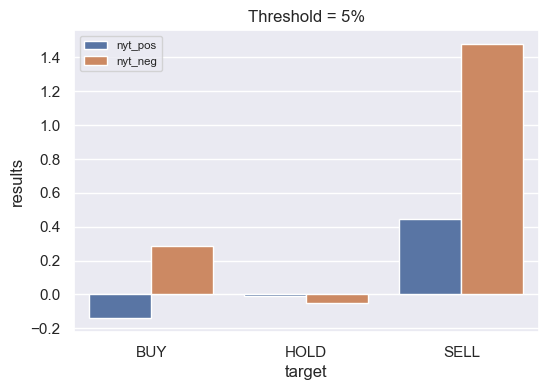

In [116]:
# plot with seaborn barplot
sns.barplot(data=df_5_nyt, x='target', y='results', hue='metric')
plt.legend(fontsize='x-small', title_fontsize='10')
plt.title('Threshold = 5%')

## Imbalance

Text(0.5, 1.0, 'Threshold = 3%')

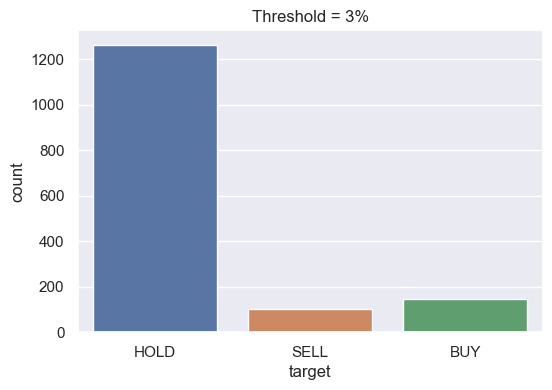

In [117]:
sns.countplot(train_3['target'])
plt.title('Threshold = 3%')


Text(0.5, 1.0, 'Threshold = 5%')

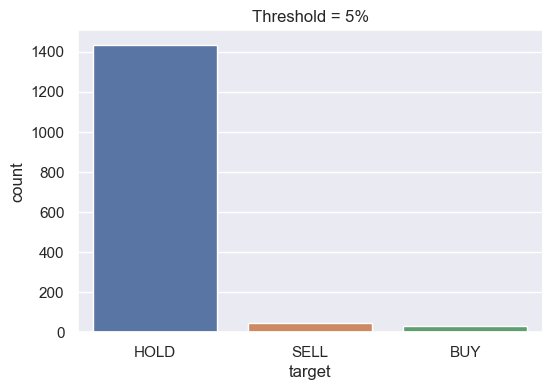

In [118]:
sns.countplot(train_5['target'])
plt.title('Threshold = 5%')

## Correlation

### Macro Econ Variables: % Growth

In [119]:
growth_features = pd.read_excel('data/model_inputs/X_train.xlsx').iloc[:,1:]

In [120]:
growth_features

,adj_close,reddit_pos_both,reddit_neg_both,reddit_neu_both,nyt_pos,nyt_neg,nyt_neu,quarterly_gdp_growth,monthly_cpi_growth,monthly_st_ir_growth,monthly_unemployment_growth
0,-1.240280,0.393284,-0.098376,-0.254698,0.258980,-0.027540,-0.192837,0.631944,-0.101080,0.082686,0.017860
1,-1.231993,-0.159879,0.972350,-0.553752,5.119592,0.809901,1.945725,0.631944,-0.101080,0.082686,0.017860
2,-1.230976,1.201887,-0.098426,-0.921882,3.615479,0.845102,2.525844,0.631944,-0.101080,0.082686,0.017860
3,-1.237771,1.258748,-0.763464,-0.498465,3.849877,0.919737,3.190237,0.631944,-0.101080,0.082686,0.017860
4,-1.240625,0.276294,-0.211005,-0.072350,0.014743,0.054460,1.431607,0.631944,-0.101080,0.082686,0.017860
...,...,...,...,...,...,...,...,...,...,...,...
1445,2.440348,-0.357990,-0.617946,0.734099,-1.125003,-1.019085,-1.550085,1.102218,-0.115038,-0.073827,-0.304847
1446,2.506547,0.014023,-0.676437,0.467094,-1.078118,-0.770562,-1.549150,1.102218,-0.115038,-0.073827,-0.304847
1447,2.548418,-0.308494,-0.581064,0.667369,-1.040416,-0.702239,-1.542936,1.102218,-0.115038,-0.073827,-0.304847
1448,2.579788,-0.649372,-0.706349,1.036594,-1.071824,-0.699101,-1.432188,1.102218,-0.115038,-0.073827,-0.304847


In [121]:
corr = growth_features.corr()

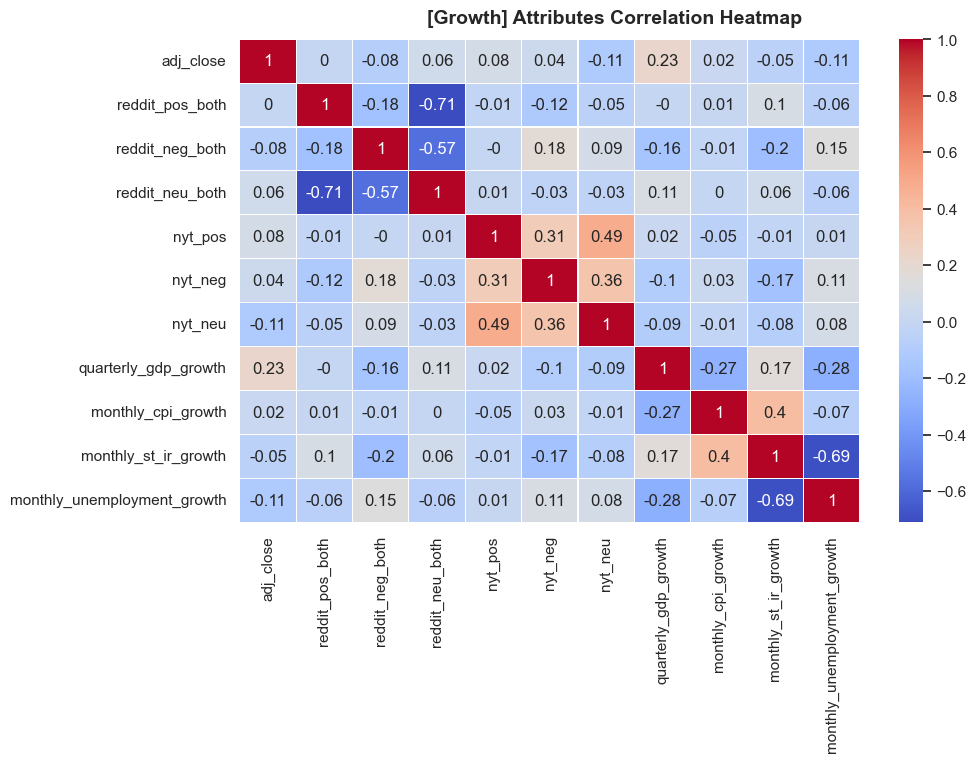

In [122]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(corr,2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('[Growth] Attributes Correlation Heatmap', fontsize=14, fontweight='bold')

### Macro Econ Variables: Actual

In [123]:
actual_features = pd.read_excel('data/model_inputs/x_train_3perc_lag3.xlsx').iloc[:,1:-4]

In [124]:
corr = actual_features.corr()

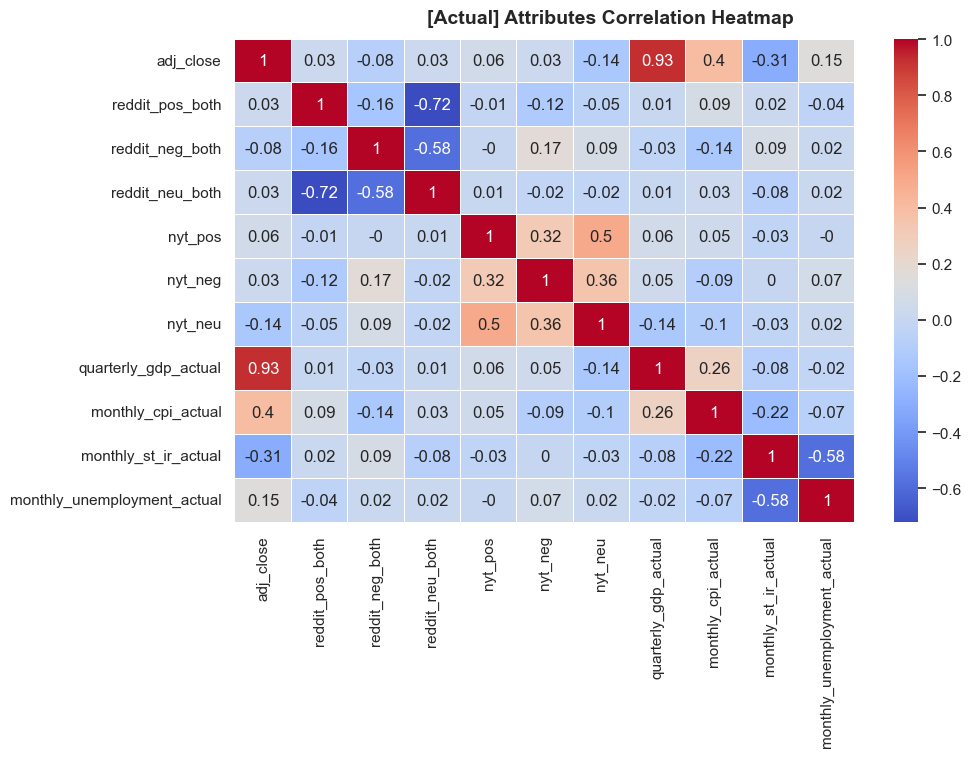

In [125]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(corr,2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('[Actual] Attributes Correlation Heatmap', fontsize=14, fontweight='bold')